In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [3]:
# data has already been sorted into traning and test datset
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [4]:
print(f"Traning sample: {train_data[0]}"),
print(f"traning labels: {train_labels[0]}")

Traning sample: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   

In [5]:
train_data[0].shape , train_labels[0].shape

((28, 28), ())

training labels 0


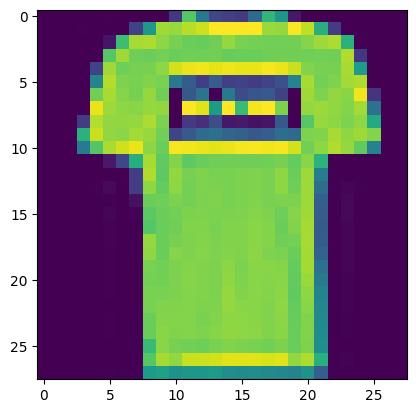

In [6]:
# plot sample image

import matplotlib.pyplot as plt
plt.imshow(train_data[1])
print(f"training labels {train_labels[1]}")

In [7]:
# create a small list of readable labels for index of our traning instead of integers
class_names = ["T_Shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankel boot"]

len(class_names)

10

Text(0.5, 1.0, 'T_Shirt/top')

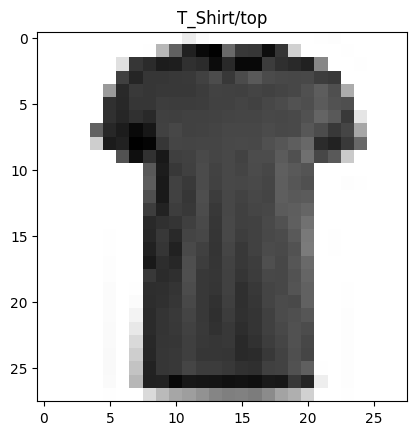

In [8]:
plt.imshow(train_data[17], cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]])

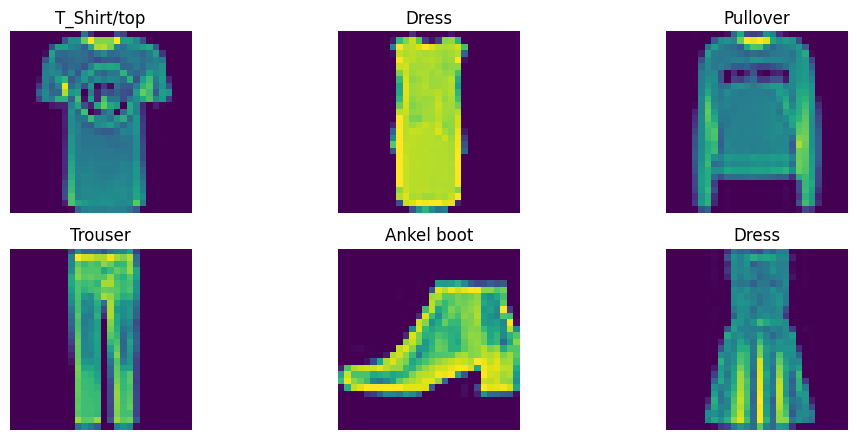

In [9]:
# plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(12,8))
for i in range(6):
  ax = plt.subplot(3, 3, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index])
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building Multiclass Classification model

In [10]:
tf.random.set_seed(42)

# create the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model.fit(train_data,
                    train_labels,
                    epochs=10,
                    validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.8579 - accuracy: 0.2169 - val_loss: 1.7030 - val_accuracy: 0.2722
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6458 - accuracy: 0.2823 - val_loss: 1.6021 - val_accuracy: 0.3020
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5785 - accuracy: 0.3042 - val_loss: 1.5508 - val_accuracy: 0.3326
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5384 - accuracy: 0.3261 - val_loss: 1.5211 - val_accuracy: 0.3298
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5105 - accuracy: 0.3445 - val_loss: 1.4986 - val_accuracy: 0.3525
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4920 - accuracy: 0.3549 - val_loss: 1.4820 - val_accuracy: 0.3631
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4782 - accuracy: 0.3602 - val_loss: 1.4741 - val_accuracy:

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Check min and max values
train_data.min(), train_data.max()

(0, 255)

In [13]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [14]:
tf.random.set_seed(42)

# Create model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer="Adam",
                metrics="accuracy")

# Fit model
norm_history = model_1.fit(train_data_norm,
                           train_labels,
                           epochs=10,
                           validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0121 - accuracy: 0.6333 - val_loss: 0.7297 - val_accuracy: 0.7550
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6772 - accuracy: 0.7663 - val_loss: 0.6692 - val_accuracy: 0.7686
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6287 - accuracy: 0.7849 - val_loss: 0.6393 - val_accuracy: 0.7798
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5960 - accuracy: 0.7952 - val_loss: 0.6013 - val_accuracy: 0.8007
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5700 - accuracy: 0.8039 - val_loss: 0.5942 - val_accuracy: 0.7948
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5496 - accuracy: 0.8111 - val_loss: 0.5830 - val_accuracy: 0.8006
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5362 - accuracy: 0.8148 - val_loss: 0.5775 - val_accuracy:

<Axes: title={'center': 'Normalized data'}>

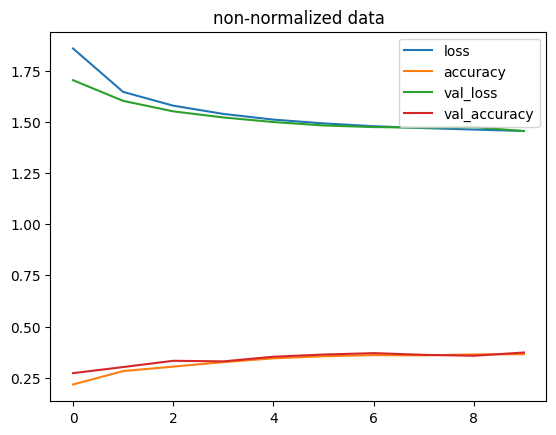

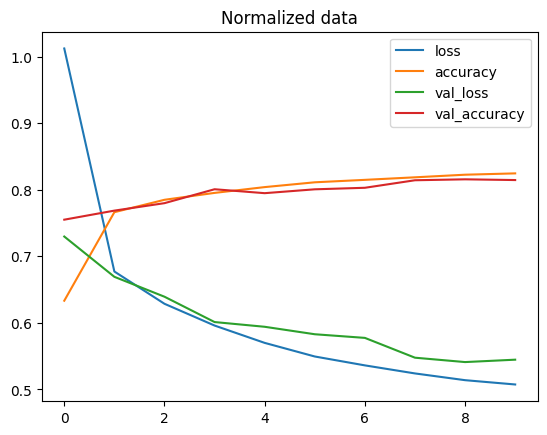

In [15]:
import pandas as pd

# plot non-normalized data loss curves
pd.DataFrame(history.history).plot(title="non-normalized data")

# plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

In [16]:
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer="Adam",
                metrics="accuracy")

# Create learning rate callback
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit model
lr_norm_history = model_2.fit(train_data_norm,
                              train_labels,
                              epochs=20,
                              validation_data=(test_data_norm, test_labels),
                              callbacks=[lr_schedule])

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.9765 - accuracy: 0.6455 - val_loss: 0.6604 - val_accuracy: 0.7818 - lr: 0.0010
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6044 - accuracy: 0.7948 - val_loss: 0.6179 - val_accuracy: 0.7910 - lr: 0.0011
Epoch 3/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5645 - accuracy: 0.8063 - val_loss: 0.6037 - val_accuracy: 0.7883 - lr: 0.0013
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5457 - accuracy: 0.8121 - val_loss: 0.5729 - val_accuracy: 0.8029 - lr: 0.0014
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5366 - accuracy: 0.8152 - val_loss: 0.5717 - val_accuracy: 0.8013 - lr: 0.0016
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5296 - accuracy: 0.8176 - val_loss: 0.5883 - val_accuracy: 0.7975 - lr: 0.0018
Epoch 7/20
1875/1875 [==============================] - 7s

<Axes: >

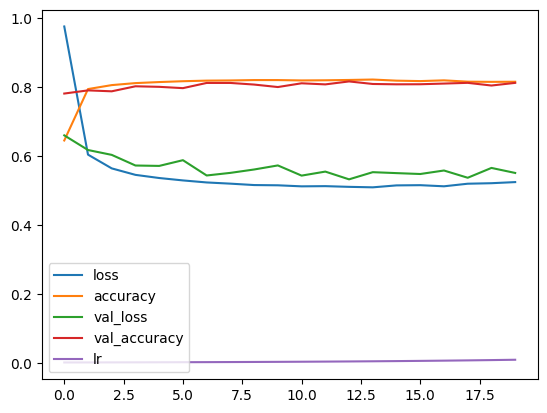

In [17]:
pd.DataFrame(lr_norm_history.history).plot()

In [18]:
model_1.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5448 - accuracy: 0.8145


[0.5447640419006348, 0.8144999742507935]

In [19]:
model_2.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5513 - accuracy: 0.8128


[0.5512770414352417, 0.8127999901771545]

In [20]:
# Model prediction probabilities
y_probs = model_1.predict(test_data_norm)
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[2.4261868e-07, 1.4814993e-09, 3.7321388e-10, 7.8986623e-10,
        5.0243308e-08, 5.2254331e-01, 2.3901353e-07, 1.6494508e-01,
        1.1465908e-03, 3.1136438e-01],
       [4.8238653e-04, 2.7493511e-06, 9.4998467e-01, 9.4306316e-08,
        1.7783171e-02, 1.1059557e-23, 3.1746402e-02, 0.0000000e+00,
        4.1933529e-07, 5.2952294e-32],
       [1.4398321e-07, 9.9930358e-01, 1.3109791e-04, 6.0952522e-07,
        5.5905827e-04, 4.8325735e-09, 1.8887029e-06, 7.2857733e-07,
        4.1098366e-07, 2.5379113e-06],
       [8.4863228e-07, 9.9838883e-01, 2.3933432e-04, 6.1858577e-06,
        1.3035154e-03, 2.0100961e-07, 8.3870027e-06, 2.4343261e-05,
        3.2591583e-06, 2.4935949e-05],
       [3.1925917e-01, 8.0327205e-05, 2.2480121e-01, 7.1886969e-03,
        2.1612057e-02, 3.4411409e-09, 4.2555690e-01, 4.0371780e-19,
        1.5015816e-03, 1.4077350e-15]], dtype=float32)

In [21]:
# convert prediction probabilities into integer
y_preds = y_probs.argmax(axis=1)
y_preds[:5]

array([5, 2, 1, 1, 6])

In [22]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_labels, y_preds)

array([[787,   5,  31,  86,   5,   3,  73,   0,   9,   1],
       [  2, 954,  10,  30,   3,   1,   0,   0,   0,   0],
       [ 29,   7, 737,  18, 151,   0,  55,   0,   3,   0],
       [ 21,  21,  17, 892,  24,   5,  17,   0,   3,   0],
       [  2,  10, 128,  59, 748,   0,  48,   0,   5,   0],
       [  0,   0,   0,   1,   0, 917,   0,  50,   7,  25],
       [192,   5, 152,  85, 176,   2, 377,   0,  11,   0],
       [  0,   0,   0,   0,   0,  41,   0, 932,   0,  27],
       [  8,   1,   4,  20,  11,  12,  35,   5, 901,   3],
       [  1,   0,   0,   0,   0,  38,   0,  60,   1, 900]])

In [25]:
import random

def plot_random_image(model, images, true_labels, classes):
  '''
  pick a random image, plot it and labels it with prediction and truth labels.
  '''
  i = random.randint(0, len(images) - 1)

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*pred_probs.max(),
                                                   true_label),
             color=color)

1/1 [==============================] - 0s 21ms/step


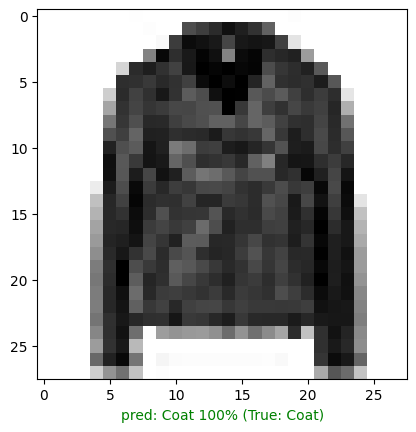

In [28]:
plot_random_image(model=model_1,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)